In [32]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import math

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics
import statsmodels.api as sm

In [2]:
df=sm.datasets.fair.load_pandas().data

In [3]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
def affair_check(x):
    if x!=0:
      return 1
    else:
      return 0

In [5]:
df['Had_affairs']=df.affairs.apply(affair_check)

In [6]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [7]:
df.groupby('Had_affairs').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_affairs,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


Every data row was grouped by whether or not that woman had an affair.

So by either 0 or 1 and then it took the mean of every value or every row in that particular group. So looking at a brief glance of this data it looks like women who had affairs were slightly .And then also looks like they were married a little longer. Slightly less religious and a little less educated.

However the mean values for both these cases are really close for most of the variables.

So we can't say any thing for certain yet.

<AxesSubplot:xlabel='age', ylabel='Count'>

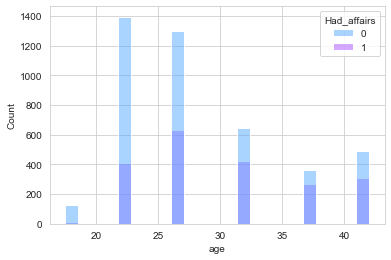

In [8]:
sns.histplot(x='age',data=df,hue='Had_affairs',palette='cool')

<AxesSubplot:xlabel='children', ylabel='Count'>

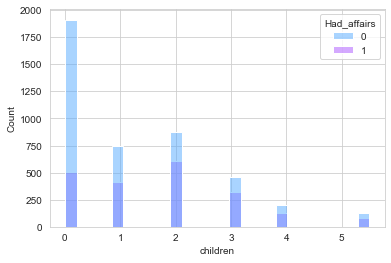

In [9]:
sns.histplot(x='children',data=df,hue='Had_affairs',palette='cool')

So interestingly it looks like as the number of children increase you're more likely to have a woman

that has had an affair and looks like the women that had no children were less likely to have an affair.

So that's an interesting little tidbit there.

In [10]:
occ_dummies=pd.get_dummies(df['occupation'])
hus_occ_dummies=pd.get_dummies(df['occupation_husb'])

In [11]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [12]:
occ_dummies.columns=['occ1','occ2','occ3','occ4','occ5','occ6']

In [13]:
hus_occ_dummies.columns=['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [14]:
X=df.drop(['occupation','occupation_husb','Had_affairs'],axis=1)

In [15]:
dummies=pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [16]:
X=pd.concat([X,dummies],axis=1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [17]:
Y=df.Had_affairs
Y.tail()

6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_affairs, dtype: int64

We can take care of multi-collinearity by dropping one column of each dummy variable so number we have

for x.

Let's go in and take a look at it and we're going to drop the first occupation column and the first

husband's occupation column.
 we're going to need to drop this affair's column as well.

And the reason for that being it's basically just a repeat of our Y t

In [18]:
X=X.drop(['occ1','hocc1'],axis=1);
X=X.drop('affairs',axis=1)

X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [19]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_affairs, dtype: int64

In [21]:
#flattening the array
Y=np.ravel(Y)
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

So all our data  are spread and basically we're going to do extremely similar process to the linear regression

and we're just going to create a model fit the data into the model check

or accuracy score and then we'll split the data into testing and training sets and see if our results

improve.

In [24]:
log_model= LogisticRegression()
log_model.fit(X,Y)
log_model.score(X,Y)


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7252591894439209

We have a 73% accuracy and now we compare it with the y data

In [25]:
#perchanthge of women that had affairs
Y.mean()

0.3224945020420987

which means the model just simply guessed the percantage of women that had affairs. 1-.32=.68

In [27]:
#cheching xoefficients to see whats the stronger predictors
coeff_df=DataFrame(zip(X.columns, np.transpose(log_model.coef_)))

In [28]:
coeff_df

,0,1
0,rate_marriage,[-0.6689563229689033]
1,age,[-0.06025442312061723]
2,yrs_married,[0.10695652857398869]
3,children,[0.015317756543493353]
4,religious,[-0.3430058817163857]
5,educ,[0.030078606942314578]
6,occ2,[0.25364490391926936]
7,occ3,[0.6354455145451507]
8,occ4,[0.305684673516181]
9,occ5,[0.8560905582331937]


And now here we have all our coefficients. So. What do we see here looking at the coefficients here.
We can see that a positive coefficient corresponds to increasing the likelihood of having an affair
while a negative coefficient means corresponds to a decrease likelihood of having an affair.

As the data value point increases. So you might expect an increased marriage rating corresponded to a decrease in the likelihood of having

an affair.So if the woman reported having a good marriage the likelihood of having an affair decreases.

That makes sense and most looks like increased religiousness seem to correspond to a decrease in the

likelihood of having an affair.

Since all the dummy variables the wife and the husband occupations are positive.

That means that the lowest likelihood of having an affair corresponds to the baseline which was the

occupation we dropped.

And in that case it was one which was the student occupation.

In [33]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y)

In [35]:
log_model2= LogisticRegression()
log_model2.fit(X_train,Y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
log_model2 = LogisticRegression()

#log_model2.fit(X_train,Y_train)

In [43]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train) 
X_test = sc_x.transform(X_test)
print(X_train[0:10,:])

[[ 0.92482112 -1.02937165 -0.40653261 -0.96616273  1.78477383 -0.10706662
  -0.39204265  1.13612805 -0.63992729 -0.36084392 -0.13463853  1.97648041
  -0.28300265 -0.69271293 -0.61657739 -0.3052851 ]
 [-1.15580849  0.43299805  0.56013217  0.43558803 -0.48615108 -1.02062527
  -0.39204265  1.13612805 -0.63992729 -0.36084392 -0.13463853 -0.50594987
  -0.28300265  1.44359943 -0.61657739 -0.3052851 ]
 [ 0.92482112 -0.2981868   0.00775229  1.13646341 -1.62161353 -1.02062527
   2.55074289 -0.88018248 -0.63992729 -0.36084392 -0.13463853  1.97648041
  -0.28300265 -0.69271293 -0.61657739 -0.3052851 ]
 [-0.11549368  0.43299805  1.04346456  1.13646341 -0.48615108 -1.02062527
   2.55074289 -0.88018248 -0.63992729 -0.36084392 -0.13463853  1.97648041
  -0.28300265 -0.69271293 -0.61657739 -0.3052851 ]
 [ 0.92482112 -0.2981868   0.00775229  0.43558803 -0.48615108 -0.10706662
  -0.39204265 -0.88018248  1.56267753 -0.36084392 -0.13463853 -0.50594987
  -0.28300265 -0.69271293  1.62185642 -0.3052851 ]
 [-0.

In [46]:
log_model2 =LogisticRegression(random_state = 0)

log_model2.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [48]:
class_predict=log_model2.predict(X_test)

In [49]:
print(metrics.accuracy_score(Y_test,class_predict))

0.7267587939698492


So really really similar to our original.

It's basically the same accuracy score.

Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

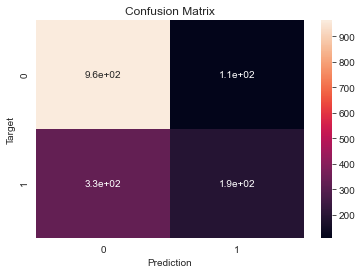

In [50]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(Y_test,class_predict)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')